# Basic tutorial

Tthis tutorial is strongly inspired by this [tutorial](https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/). Its purpose is to allow you to take a first step into the world of Pytorch!

**Pre-trained models** will be used for **image classification**

Pre-trained models are neural network models driven on large data sets (such as ImageNet, which contains more than 14 million images from different classes).

The purpose of pre-trained models is to predict the class (or labels) of an input image. This process is called model inference. It includes the following main steps:

- Reading the input image
- Performing transformations on the image, for example resize, center crop, normalization, etc.
- Forward Pass: Use the pre-trained weights to find out the output vector. Each element in this output vector describes the confidence with which the model predicts the input image to belong to a particular class.
- Based on the scores obtained, display the predictions.

## step 1 : Loading a pre-trained network using TorchVision

TorchVision is a pytorch package. It consists of popular data sets, model architectures and common image transformations for computer vision. The different models available can be found here : [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html)

**How to decide which model to choose for a particular task ?**

The pre-trained models can be compared on the basis of the following criteria :

- Top-1 Error: A top-1 error occurs if the class predicted by a model with the highest confidence is not the same as the real class.
- Top-5 Error: A top-5 error occurs when the real class is not among the first 5 classes predicted by a model (sorted in terms of confidence).
- Inference time on CPU: The inference time is the time taken for the inference step of the model.
- Inference time on GPU
- Model size : Here the size represents the physical space occupied by the .pth file of the preformed model provided by PyTorch.

A good model will have a low Top-1 error, a low Top-5 error, a low inference time on the CPU and GPU and a low model size.

please define the pre-trained model you want to use using one of the predefined models in torchvision that you will call `model`

**indicators :** [`torchvision.models`](https://pytorch.org/docs/stable/torchvision/models.html)

**Solution :**

First of all, the different models and architectures available will be displayed.

In [1]:
import torchvision.models as models
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'Inception3',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

We can see that there is an entry `AlexNet` and another `alexnet`. Names beginning with a capital letter are Python classes (AlexNet) while alexnet is a function that returns the model of the AlexNet class. It is also possible for these functions to have different parameter sets. For example, densenet121, densenet161, densenet161, densenet161, densenet169, densenet201, all are instances of the DenseNet class but with a different number of layers - 121, 161, 169 and 201, respectively.

Here we choose to use the resnext101_32x8d network which has a Top-1 error and a Top-5 error below.

In [2]:
model = models.resnext101_32x8d(pretrained=True) # downloading of the network and its weights
print('Network architecture :', '\n\n', model)

Network architecture : 

 ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv

<img src="https://www.codeproject.com/KB/AI/1248963/resnet-r-700.png" width="900"/>

This model is composed of several layers, and has the particularity of introducing residual connections. Unlike **convolutional neural networks** which have a **linear architecture** (a stack of layers whose output is only connected to the next layer (architecture **A**), we will see these networks in more detail in the next tutorial), **in a residual network, the output of the previous layers is connected to the output of new layers to transmit them both to the next layer** (architecture **B**) :

<img src="https://makina-corpus.com/blog/metier/2019/classicresnetsimplified.png" width="300"/>

the ResNet network is composed of 6 basic building blocks:

- a **convolution** (see [Conv2d](https://pytorch.org/docs/stable/nn.html#conv2d))
     - a convolution is an operation that serves at evaluating the match of a local area of the input with given features
     - the image is convolved by characteristic kernels (also called features)
<img src="https://stanford.edu/~shervine/images/convolution-layer-a.png" width="600"/>
<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/35_blog_image_11.png" width="600"/>


- a **Normalization** (see [BatchNorm2d](https://pytorch.org/docs/stable/nn.html#batchnorm2d))
    - Normalization of convolution-generated characteristic maps

- an **Activation** - Linear Rectification Unit function (see [ReLu()](https://pytorch.org/docs/stable/nn.html#relu))
    - allows to keep only positive values in the characteristic cards generated by the convolution
    - ReLU(x)=max(0,x) <img src="https://pytorch.org/docs/stable/_images/ReLU.png" width="400"/>
    - other types of activation :

![ReLU](https://qph.fs.quoracdn.net/main-qimg-07bc0ec05532caf5ebe8b4c82d0f5ca3)    


- a **Pooling**
    - a Max Pooling (see [MaxPool2d](https://pytorch.org/docs/stable/nn.html#maxpool2d))
        - allows you to keep only the maximum values in an area
        - reduces the characteristic map
    - an Average Pooling : voir [AdaptiveAvgPool2d](https://pytorch.org/docs/stable/nn.html#adaptiveavgpool2d)
        - allows you to keep only the averages of the values in a zone
        - reduces the characteristic map

<img src="https://www.researchgate.net/profile/Jelo_Salomon/publication/324728060/figure/download/fig13/AS:618948064202766@1524580126373/Max-and-Average-Pooling-Operation-2.png" width="400"/>

- **fully connected**
    - a network where all neurons of the output layer are connected to all neurons from the input layer
    - Linear (see [Linear](https://pytorch.org/docs/stable/nn.html#linear))
        - Applies a linear transformation to input data

## step 2 : Specify image transformations

Once we have the model, the next step is to transform the input image so that it has the right shape and other characteristics such as mean and standard deviation. These values must be similar to those used in the formation of the model. This ensures that the network will produce meaningful responses.

define the transformations to be performed on your image so that it is the right shape for your model.

**indicators :** [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html) + [torchvision.transforms](https://pytorch.org/docs/stable/torchvision/transforms.html)

**Solution :**

In [3]:
# Here we define a variable transformation
#     which is a combination of all image transformations
#     to be performed on the input image.
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),      # Resize the image to 256×256 pixels.
    transforms.CenterCrop(224),  # Crop the image to 224×224 pixels around the center.
    transforms.ToTensor(),       # Convert the image to PyTorch Tensor data type.
    transforms.Normalize(        # Normalize the image by adjusting its average and
                                 #     its standard deviation at the specified values.
    mean=[0.485, 0.456, 0.406],                
    std=[0.229, 0.224, 0.225]                  
    )])

## step 3 : Load the input image and pre-process it

- choose an image on the internet and save it
- execute the transformations defined in the previous step
- prepare a sample for transmission over the network

**indicators :** [urllib.request](https://docs.python.org/3/library/urllib.request.html) + [PIL](https://pillow.readthedocs.io/en/stable/reference/Image.html) + [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze)

**Solution :**

In [4]:
url_image = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSEhMVFhUVFhUYGBcXFxYYGhgXFxgXFxUVGBUYHSggGBolGxUWITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFQ8QFS0dFxkrLS0rKysrLS0tKy0rLS0tKy0tLS0rLS0rLS0rLS0tLTctLS03Nzc3NyssLTcrLS0rK//AABEIALcBFAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAQIEBQYDBwj/xAA6EAABAwIDBQYFAwQCAgMAAAABAAIRAyEEEjEFQVFhcQYTIoGRoTKxwdHwB0LhFFKS8SNicoIVorL/xAAYAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/EAB4RAQEBAQADAQADAAAAAAAAAAABEQISITETIkFR/9oADAMBAAIRAxEAPwD0qm1V+1Nq90JH8zy49FlK/boAuy3i1uNwJH1Waxe2q2IfIBaDq33XS3ExrMXtx9aHBjmkG87xvHVVu3K0D4oNiHCYPI/fkuFHaL2yCCYBkaTzE7+SXDj+oe1sSBrEwBzC4263IkdmcA6pFR7pM6X142s5b/EgUqYIgZbn6qr2ds3IQBy9ArXaTJYRxELn1fTU+oO0alg7mD5SF5z+olGpTYXMPgcZdfjuA6q8pbQqNacO5rpYQ3OTbKI8QPGLQq/9Q9p0xh+5EGo8WESQ0am+k6LnLrvniznYpwPhcBfQn5Lb4OnleWn4TPvqDwOv4bed9jsUDmbun/E7uhWvdjoylzg0tcBJ0I6hWn1eGq2kJJ+FoAv1PsFk9qdozVflBcKclpIueFgpu0K4rQLwLmJ4RClYTY1MDMAPyDMeysc6w+0sLWrP7pjszZ+O4zNJHiuLGDccQdU2rsHuyykY8IgncTEk8hcXW2xFBrMpEAQQ7z0vw+sKDiGtfkl0S4NzcJ1B6gQukrnjK4iqWVM8G3A3BtP1PmrMYvMYZBzNZc2tbX/MeSsMZsR3dHMzMCSARFniABxALZvpY71SYak1lZtKm4kkSc0Wfq1rSNRff/bwWmVsMoAaL+AmNb5ARfyPorfD02sa1zjcxIOmjjv01HoqoMeA23iJqa82yATugTbqrdrC4uECRUYbx4WQSY6zHks1qLWgxkxAkx6WJ6ahLtHCNygMYDuAnQ8TzlQ2nwl7QSdJ/wC3IeYuu+DrkAAyd1onn4tBb2TF3Gfw2DqscHHjoNOoP1Wr2S02LnCeqh4t4e3wtsb5racjwUjZJi0fT5Ll1zldZ3sbPZToVqWqs2GyblXhYvRx8efr6hOpKPVw8qzLUmRaZZjG7Lz2UGl2caDMLaGgECgFLzGp1WXbsYcEf/ELU9yEnchTwi+dY+v2ba/VDOy9Mblse5R3IU/OHnf9Yqv2YbqLKPW2AS2Fu3UQuL8OFfCHnXnTuzjkLfnDIWfzi/pXz9sHZr3OBc05TBMHX6jVbSvSp5NDIi+8fdRdjuDXBrY5WEHgeRWrOyw9txBjdoVayw5qlxLHSXAajQxvM/nNaTsZgx4nix0iN438lV1tmPpPcco4zuPFansyP+Oft8wstLLDOioBbfvXTa9R2WGCXGw4DmeihveRVHC/NTHOkc1mtT1WV2tsyo4tDXAxrI1dBMnkSFlsd2Xexj61dwfVJ623j0kL0l5Ez6qh2nV712QaNufPRc7kdZbXmWJ2YaFaWeEVJE/9oaQfUpzNouqtax3xeIEkRvIBtw+62m2cOIFtCPz2UbZGyDHiAOhiZ52zTxhdJ7YtxP2Bgw2mDy1vHObWVji64b4RMnQ2OnNAdl8IYWj/AKxHneyhGTZ3ExfTn/qFWNVmMxRcfFT6jSeBaesKTTotqM+HUxceYze9+q6h3MG/EeIceRVhhqJBzAkgwYta86joDz4oI9TBSwZZDptxEgXPS/ms8/Y5L+9yhhaQTlgR4WuN+R38zZa8NAbviTprxgTun0sm7SpFzSGQC4ADoSD8ifQJoqNjgVmOdoS53hsdZAuuFMFjyJMBjnu5AZmgSf8Ay1Vds6uMJjRRk5KpfHWQWz0BAVlioqVCwOs+AeGsu66s+SqLLBuDg0ftAuTa0OIPLQ/4hJTwpe4BpytfmyiNwvlOsD4Z5lGDYXyWk5bOBA1MuA5REHqOavsLhAGw0ENAgdJv6n1hIVmsQe5ysPjOkkxeCSYG6N/2vFfjnMeHGQ3gI03EK12ngg0FwBcYIi075N9N481mcU0FuVwPACTb11PFXNTcegdlO0NN9hNrXP21W3oVMwkL5272rQLajDDWn4b39fsvYeyfaEV2AnWBItbkdwXTmema1kIhIwynQiBCEIBKhCqhCEIEKYQnppQciEqUpER4r2VxTc2odHC2m8A/RehYfEAttceqwfZ/An+0CdSY+fNa6izIOX5vXLW8Q9t3BgmfL6qX2cf4ADP5zUfHyQYv6H5pdg1TBmddOHss/wBqvH0QSCleITg5Um29qZAY14Aj6qVqG7RrBsy7oLSFQvxDWAumSTeI9LrObV7RFx18rn3AUDBY41HFxJAEaA35bljwvV2teckyNnTzVLumOG/zg/VSX5yIa1pjSGO+c2KhbHh4tbk8H1Fpj7qe00wD1vBeb+WnsusmOdppxMatIcAbTrzgmyrn4vXidWm45WJAA913q4toaYiBxkQeZk/JU9TEgTEEkTqw/wCLj5qosMM4OMyAZ+EnfwB9td266vcPl3m9gd3kfoeJWWw9WAMpg/EQ73OUz7StPstgqQSAHcjINoNzYhRZVph8N4cw6xHDW35qmuws/nHerHD0oHXUc/8ASkOw/ru6KGvOe1ezhle8N8bfhMGxALhEccouo2zKVSthw4gy0E1LiQc2sDQSwNK3O09nyCSJ0twsZ9lm9hNBNS8xlm1rDd1IP4VUS9iUS002WyimLRe2WJ85/CtcynYDjCzOy4OJsLNaQeua3vn81sKcIqm2hs+RMaTHysOllgdsQ1xY1sZYuL9QN5PE6cF66+lmHksXtnYTgS4WG+BM8gBrO+VqMsQarnh02aJvEH21Wr/TWoMl2l1zrZo6Aqi2ps9zASQTPETu8+it/wBLmkl5PHf9zK3yler0Tb7J5TGCAllAqEiECoQhAqEiVAJpSoQcyhOQqjybYudgEtJaeZMey0JpgibjzVRsJri0ZTbyj1F1dPw4ItAPIlcHSIlbBuAkO/OYCjbKgOI0Pp7fyp9YOaN355rKY7FmnUzHjuAaP8ijTYYrFMa3xEjp/C8p7adqMxcxj5A36+hhP7T7cY4R4j/7NI6iPusHVrOc7WRzAPWLGPJbkYtPw73PcXlxseQk8JWw2O8O/v3SHAOtxzRbU2lZ7ZrmkhsAuvcmP/wRHnK1+Aw7XfGzLEGG+KePw6bt6trMXdIOAk+FrtzQbc46LvT2q1rcsgm2rREcS0b+fzVPiKrTAaXCJkCrl03ZCL6bio1OpewLp/vDSSORDpGm/LKirbaGMA0F/wC/LOh4g281m24vMTOUxfRsek9dFt8DstxaCIaYEiw1ExMj3lPo9lxUcBUZvMOOo00c0D3QZPZrgXNzjK52kOGU/nmV6N2c2ZlbuiQeis9mdnaFJoAY35/PRWoY1ogQFFNp0o1QW+qK1QASkw75n86II+0qMtI3xHnosvsqhlfVtvmeWjf/AKgHzWyqiQqKhRh7+J9hoAoKzZ7MuIIjWT5Dl1PzWpa/T8/NVktoHu8RSdvJLfIxHy91ojV8IO8KKtqT7Jv9UxxySCY05LOdrNuf0uGdVgnd4QSeluvpKwW3+0GKouwmIo1DkruyupuA+KxnjMTquk5tms2+8bjthTa1gMxzA9lW/plgnAvN8ua1/kPutDtPZxqUmRM6nfM8lI7I7P7sEaX04eSSlaZrUQnQhVDUJSEQgQJyRKgRCVIgRCckKoaUISoPKthYw6NIPJ27z3q9pvcdQ0dFn9nsGl+F5E+qsmv3THv8iuLol4ymC0zPqR8gsB2haAYGb/En3IlbZznCLz5fb7Kp7W4wMpx4BO9wn2zA+yQeT7ZqMB1c7/2cPmOqrcMRIEAjnfykiVcbX2pPgHd9QxjT65ZXDD4fdeTexECRvb/C6OadsltHvG5yCyZLQSL2jdHoVpKm0AXEU2eEDQlwvv8ACQIiOKz+FosDbGq5/wD1MAcQcotYKUzC1KhDWsykCZa025kuNwfooq1bjaYbNZrW2iBYjho0k+UqZ2Xb3ji2nTGS+sEnmbyfNRMHsao8tE5zvAktnfIFtOBXo3ZvYZpN+ACfXz1+aot9mYMZRaFIrlrTpYcvqu1GnFrwjF0A9pHJZVlcf28w+c0KLs9XSGiRO4CNT+SAqLam1zSqBlXEOYagAhxaQZIEQR4dfe8rP9pey9XZ2JZjMOzO1rpc1oM3kutw6K4O1tk4osxNUs7ynufYg8CDrddeOZfrn1bFnhe1hpVv6bEDK4/C4ukPbbQwN+7nvWvwtSwy3kDfrYcV4L277QU8XXaaJtT0IBuTHDcAFvf0528alPI53ibAIN4A0IvcEfnDPfOVrm7HpNR8BUuFrZqj9d3yU2pVt5KDghFRw4nXgYv81zaVXauiSARPEEDQiLqwwNWabZ3D1gKyxWFD2QVU4Sn3Z7o6Tbz/AJRVR2n7Sswz2NqNLqbmuFhOhEyPzRZrDtqbUxlF4pmnhqF2hwiTIJMeQWv2psqmatGpUZmDC5s8M0QSOH3WjwGzWUvgbAP1W/L+OM+PvVnSZ4AOATtlULudOp0RUMNUjZ/wqQqWQkQXBJK0hQhJmCMyBZQklLKoEIlJKBUhRKCUCISShB5jhsHmFp6ifmb+6dUZDrvdA1iIHpou4rl0xMaSDHlMX8lHqti7gANwObLy8MS4rjjepZpQMzBB5kzytKyHapr3Wc8NHK5+X3WlGOc0D4fJpb7CTxusxt3aj3EgOvpGaPI5v4VNYnEtw9MmM1Qx+45W+dpJ8lL2NSdVs1rADrbK297uJBNlXY7B1A6XlpvaCHGQeUj1UvZ4qSBnAniWueejRp7LbDZ9m+zvizNDTzafD5mAAdbDNuW2w/ZVhg1AHnWI8IPGDqq/sK4ZQ0F5je+59NQeR8pW8YoqrwOyWsOg3bgBHIK4ATUqikKRI5NDoQccVh2vBDhIKxu0f09wlYk5AHHf5R6+e5bghcXhBh8J+neEb4XUw4cTrfn6+ybsjstTw9ZxYIAsOB1g/L0W1XE4a8pViNgqJAvGpjpulKMOQQR5/P1uVNYyOac4BTQjX7lydQDjJ3G3lvSPcpDGSJUVwq4SRxBmR1UrDYcNAiY5kn0lLTCksFlYlNxAtCbSJAhd8kld/wCnC3yzUQVCnZypP9OEdwFrWUcPKeHLsKKd3QTVcQ5LK692jIgaChdA1GVByQumVEIORSLsQhB5f/W5YaILzoBr1O5uip8f3zzIGaxtn0E748RJ8lNpPuCJyjTRon1l2m/3TcQ95ADnBjTcBrvi0jcc2vTRcm0bBUwARUaaYESQ5xnTeTLR/Krdu0w0HugWjWcpl3CHK9wuAFzkM65nEGOMSQAT0lcdqYgsacxa0biTI65YGY+Z0QYfKch3yTII189YsrXYWy3FwLWtLrF0MBIBtY9NSTxXAYh1SrmDnO3SQCNLwIhvpK2mwqjTlFR7jEDKyQJ3+KxeeNlplpOzmGe1sOgct48rx6rQgKJghawgcFLUU0ldguYTwgRwXN7fzRdSiEHNoKUsT4T4QRsnJNqG4hdaiaAoGvaub12hc3oqK8LrQKVwlR6tSD/oIJuZdadTcqtuIXVlX2VRe4XVSSFW4KvorMrUSmkJqcUiqESpEqoRCEIBKkQgEiVIUAhIhUedVcMxok8zcz6uHyus/tWvkM02ZXH9xHiPExFh1Wkq4lvwgOcRzF/LcNFg+1ParVrWhoGt3AuvYWGnW2i4tHs2tUn4pO/NBLb7mjTrYCQu+am4/wDI4wBIYMrp0scp6WJ1O9Rdh4AVKZq5yJgDVkxfKcwlw0uFb4fsrLu8cSG8LkHnaJ1004yg44Vxd4WUi1gmAIzOi1hFrkX01uFf9n9jlkPc0ZrReY6G09TO+6dsul3TgwDU6u1POwvoOnArY4UBwlaC4ZhAEruQnEQEwlQKCllMD07oilBShMIQ5QdcyMyjGrwTe9TTEpIQuLKi6gyhhIXN3VdHQOS5PKBHlQa9P8CkPUTE4oUwS5ptv1txsggmWzN/P+V2o1p0P5dVG1Nog+JlxYg2A6z6qrG32tBIBuT5neQZvoqjdYHEX9fZaLC1czV463tWGmRoIm+k6WPNbrsb2jpYjwBwzRpx4kKxK1ZSJSEhWkCEiJVCoSShAqEiECpCgpEAhNJQqPLdrbGe64ec24TIG8EiwlZyrs/LDKhgTEue3xcoaJ3ALfbNxIxFFrwS0OaHDLHXUdRopLsAx4yulxG+Y9xErhjpaw+A2TWEeJxAIILYIA4fDHpCvmvLACKRLtAGDnzJ/hS3YBlIZGU3ASTYHLJ11O/kjDNvmgNvB3xA4cVUQNp0HuAL/CAZLRHi5ESA7zsrjZ22YIY4ZTYBsgk+lp5AJMVWa7cHWiZk/VZjFUXCpmc/K3MJDWtBI1LQSLydRdXUx6QyqDv9EEysNhNu1MzabWw0x4jOYngAdTf2WswuNYWw1wJiTF/OUEuEF25cw4oPFZadmphdGqRmIjVdiAQgiuTQ8Lo5m5QK4dJ/1CxrcWAP5oujKircFi/2u15TdS3uWoxUh11DxpcGy259fKN67LnP4VplVM2x4mtqNLcxhpi08FF2s5x8RI5CfQqaw949zajILSCw6A8/oqzH0CWuBd+0iImTYg313+yuLGP2rt5rJGeb3aOtxwhZbae3XVD4RltH5w4dFx7Q0HMrEOJN9TvVTUfHVbkjNqVVxTiZc4lWWy9svw9RtRhLXNIIP+/y6oDQqZc2UgE6njwUqlhiYJMT+b1pl9N9j+0LMfhxWZAd8NRv9rwNOh1HVXRXn/6P7GqYfD1H1abqedzQ0OkOcGz4yNROa3Rb8qBEqRCKVCRCAQhIqFSSiUhKBEJpKER8xdie1D6BptnwtzAt/uLi0TJ+FoAGnFe+UPgY4XcWgyei+ZdkYcNxTWn4CTJ18MTI46L33svtxuKB7u7RAngCC6B5ZfVcq3EyttWXikXeIiYAkwfhM/tmComLYacukunRpPPcFNGAh7yBEmSRqTYfIQuz6QdBNo+ixdbjKYSvWzf8/wC6wLZAbyOl9ysX4V4nVwGmYCegOvmrF2EY7xE2BMecRqpQLQA0xEb96uM6y+MxTYawsIDyGlwF7mDzA5rjsHajyZyd2zNoRENgeGTF45WWh0dPhI3D6hU+NLXTkcBH7Re58rlRWk2bj85MkWv9gVYOfKypflpuAygjIdSc4kjdviD0hW+yq5c0uO7l9VdTEpxJMDRSaVaDAXJsRKC2JKy0nhwO+6ZVDTrdRaDYSuKqOT8OP26rpBiT5hNzwuuFBcUxbSByY93+02vSLd1lFdXvE/ZajFdqjiG3vzKgYszpBgWG+TvzcYUum8SBO+LXXDF5TmlvpwVHn3bHZ+aTl9OvtqB5rzzGBzZhhzAG9oHPyXt2L7siHaQBJN+Sye0dg0nE5Kw6byDNleaXHmeBbWdlZLiJsB52nfclb3s32cdWexgBdmIEg6QW5jfUQCJVts/stUZUDAwNAAJdEzvjroF6f2V2QKIECIETETwH8LestALW/LJspXpqIdKCU2USgUFLKZCVA4lImlKqFTSUEpjigCULmShB8ef1Dg6QTZ0jkfovcv0moZMIHn95Ib/42H29F4NUfLieK9f/AE+2uTisPgmfDRY51Q7iG09OZ7x91zrUepgRJUTFNJIbudMjlCl4hwymbfkqBSB72TplHroYUsalSW0LQevmoGLpFzdbcYkjjrZd9pYksiNCYPIbz1+yRtXw3HG3SVMFFVplpDSCWzYkzbfpdQtp0SHZqfhMH56esdVf4mg1404XXAZXNhw8UfLn1CzYsV1CrDQ6o6HEnTmYHvCvKABbwOnIqsdRzRmbcF2m8G5tv3Kdha40d5HluJUxVlTpkafhU4keygUKhBibKRBOqqJDYO9c6ibSaR04KbTw0q/U1Fp0CeQ3qxwdINcLSpNKmAISspweUX6rc5ZtMxGFDxfVVGJ2UYMAK/eJQriMtRwz6YIaNdfuoFTZ7+ckEa9PstuQDqju28AmLrzivsCq83O649IPspGzezTKcgi/hk66AbzvW7fSEiw1/wBe6YabReFYiNgMCxrW2/hWLRGi4NfK6ZkCkpJTC5JKoVwTmhDSjMiHJEmZJmVDkFNzJC5AOK5uKVxXJ5QIShcXPQg+PILTMLYfpljCzGtfeSC22viIn5R5oQsVXu20n52tDbS9h8g9s+ymFggdEIUaRX0sxM7jI6WkfnFMoOaTAnf9PuhCgSpSAhu4zHJQdp0iG5m6gSfn9/VCEHHY2NzNGbfv5ixU+ph2mLIQstJeFw/srShQlKhXEtT6eAA5rs2mAEIW8YPahKhUJKCUIQInIQqEK5uZKEKBIhIClQgSEBCFQqEIVDUhSoQNlBKEIObnLjUehCIjOqIQhaR//9k="
url_image = "https://www.hdwallpapersfreedownload.com/uploads/large/animals/wolf-image.jpg" # big image
url_image = "https://imgc.allpostersimages.com/img/print/posters/frank-lukasseck-gray-wolf_a-L-8655579-14258387.jpg" # smaller image
    
import urllib.request
urllib.request.urlretrieve(url_image, 'images/img.jpg')
# saves the image in the images folder under the name of img.jpg

('images/img.jpg', <email.message.Message at 0x7fbad423a080>)

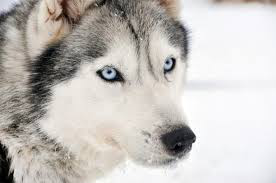

In [5]:
from PIL import Image # the Pillow module (PIL) is supported by default by TorchVision
from IPython.display import display

img = Image.open('images/img.jpg')
display(img)


# image preprocessing
img_t = transform(img)

# sample so that it can be transmitted over the network
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_t = torch.unsqueeze(img_t, 0)

## step 4 : Inference of the model

- put your model in evaluation mode and execute the inference
- using the `labels` list, containing the names of the 1000 imagenet classes, display the prediction of the model

In [6]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

**Solution :**

In [7]:
model.eval() # evaluation mode
out = model(batch_t) # model inference

# out contains the model prediction for each of the 1000 imagenet classes
print(out.shape)

torch.Size([1, 1000])


In [8]:
# to display the model prediction
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(labels[index[0]], percentage[index[0]].item(), '%')

Siberian husky 58.602928161621094 %


In [9]:
# to display the other classes to which the model think the image belonged
_, indices = torch.sort(out, descending=True)
print([(labels[idx], percentage[idx].item()) for idx in indices[0][:5]])

[('Siberian husky', 58.602928161621094), ('Eskimo dog, husky', 41.2690544128418), ('white wolf, Arctic wolf, Canis lupus tundrarum', 0.029820311814546585), ('dingo, warrigal, warragal, Canis dingo', 0.025214528664946556), ('dogsled, dog sled, dog sleigh', 0.02203085459768772)]


## optional

display the prediction of different models for each image contained in the `images` folder

**Solution :**



ATuin_1
--------------------------------------------------


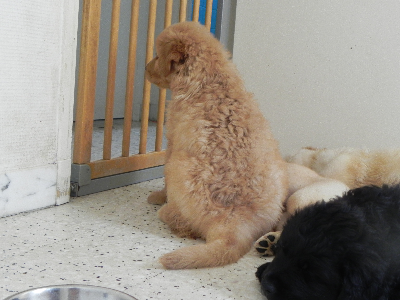

resnet18  36.9% - toy poodle 
alexnet  23.5% - miniature poodle 
vgg16  20.1% - miniature poodle 
squeezenet  34.1% - toy poodle 
densenet  35.9% - Tibetan mastiff 
shufflenet  87.2% - toy poodle 
mobilenet  17.6% - toy poodle 
resnext50_32x4d  41.1% - chow, chow chow 
wide_resnet50_2  38.5% - miniature poodle 
mnasnet  18.6% - soft-coated wheaten terrier 
resnext101_32x8d  83.4% - Newfoundland, Newfoundland dog 


Pesto_1
--------------------------------------------------


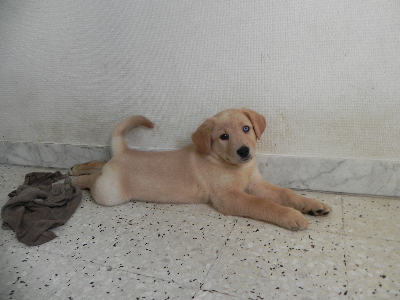

resnet18  81.0% - Labrador retriever 
alexnet  35.6% - Labrador retriever 
vgg16  91.6% - Labrador retriever 
squeezenet  47.7% - Labrador retriever 
densenet  51.2% - Labrador retriever 
shufflenet  58.2% - Labrador retriever 
mobilenet  75.6% - Labrador retriever 
resnext50_32x4d  56.8% - Labrador retriever 
wide_resnet50_2  79.9% - Labrador retriever 
mnasnet  93.2% - Labrador retriever 
resnext101_32x8d  70.7% - Labrador retriever 


Freyja_2
--------------------------------------------------


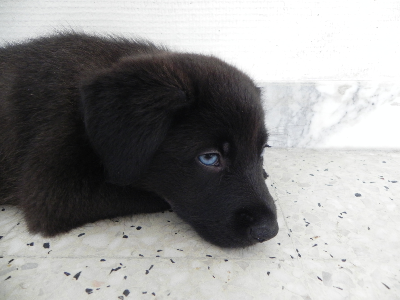

resnet18  56.7% - Newfoundland, Newfoundland dog 
alexnet  64.3% - Newfoundland, Newfoundland dog 
vgg16  34.4% - groenendael 
squeezenet  19.9% - schipperke 
densenet  52.4% - groenendael 
shufflenet  55.9% - groenendael 
mobilenet  41.0% - groenendael 
resnext50_32x4d  31.0% - schipperke 
wide_resnet50_2  78.9% - groenendael 
mnasnet  58.0% - groenendael 
resnext101_32x8d  64.2% - groenendael 


Zion_2
--------------------------------------------------


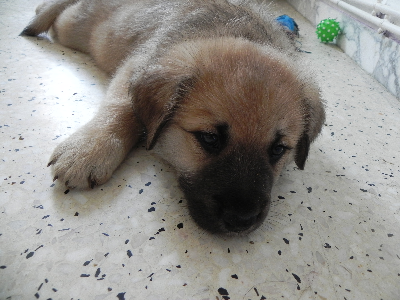

resnet18  51.5% - Pekinese, Pekingese, Peke 
alexnet  43.3% - chow, chow chow 
vgg16  79.5% - Great Pyrenees 
squeezenet  31.7% - Pekinese, Pekingese, Peke 
densenet  24.6% - soft-coated wheaten terrier 
shufflenet  37.5% - Great Pyrenees 
mobilenet  31.4% - Norwegian elkhound, elkhound 
resnext50_32x4d  69.2% - Great Pyrenees 
wide_resnet50_2  39.3% - Great Pyrenees 
mnasnet  39.0% - golden retriever 
resnext101_32x8d  70.5% - Great Pyrenees 


Zion_3
--------------------------------------------------


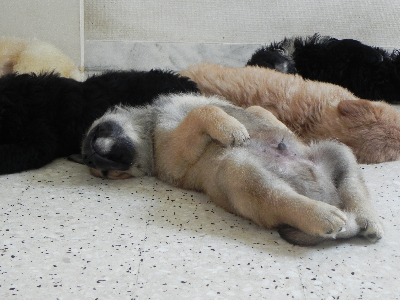

resnet18  19.7% - Eskimo dog, husky 
alexnet  24.2% - Saint Bernard, St Bernard 
vgg16  33.2% - Saint Bernard, St Bernard 
squeezenet  18.4% - Eskimo dog, husky 
densenet  37.9% - Tibetan mastiff 
shufflenet  30.2% - Tibetan mastiff 
mobilenet  19.5% - Border collie 
resnext50_32x4d  29.3% - kuvasz 
wide_resnet50_2  34.8% - German shepherd, German shepherd dog, German police dog, alsatian 
mnasnet  30.2% - Saint Bernard, St Bernard 
resnext101_32x8d  31.4% - Tibetan mastiff 


Freyja_1
--------------------------------------------------


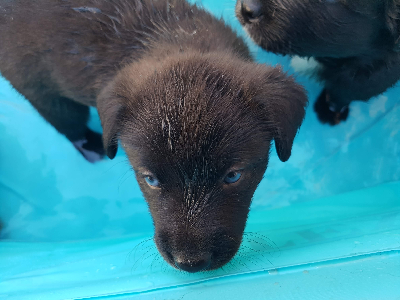

resnet18  17.7% - Siamese cat, Siamese 
alexnet  96.0% - Siamese cat, Siamese 
vgg16  19.4% - groenendael 
squeezenet  29.3% - flat-coated retriever 
densenet  74.2% - groenendael 
shufflenet  20.7% - porcupine, hedgehog 
mobilenet  21.7% - sea lion 
resnext50_32x4d  22.5% - Irish wolfhound 
wide_resnet50_2  66.5% - flat-coated retriever 
mnasnet  20.3% - Labrador retriever 
resnext101_32x8d  72.2% - Labrador retriever 


Freyja_3
--------------------------------------------------


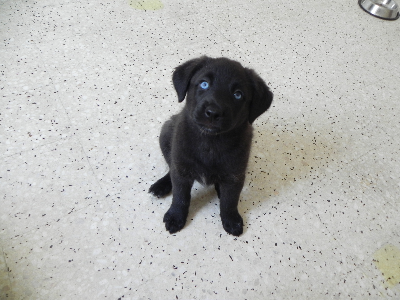

resnet18  19.4% - Labrador retriever 
alexnet  29.0% - schipperke 
vgg16  71.4% - Labrador retriever 
squeezenet  46.1% - schipperke 
densenet  47.8% - Labrador retriever 
shufflenet  38.5% - Labrador retriever 
mobilenet  59.3% - flat-coated retriever 
resnext50_32x4d  37.4% - Labrador retriever 
wide_resnet50_2  39.1% - flat-coated retriever 
mnasnet  59.7% - Labrador retriever 
resnext101_32x8d  43.4% - Labrador retriever 


Zion_1
--------------------------------------------------


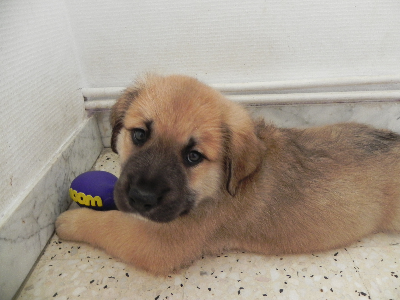

resnet18  46.3% - Leonberg 
alexnet  67.4% - chow, chow chow 
vgg16  22.9% - golden retriever 
squeezenet  78.9% - Pekinese, Pekingese, Peke 
densenet  22.6% - Tibetan mastiff 
shufflenet  25.9% - golden retriever 
mobilenet  29.8% - Leonberg 
resnext50_32x4d  42.4% - German shepherd, German shepherd dog, German police dog, alsatian 
wide_resnet50_2  54.2% - Tibetan mastiff 
mnasnet  53.2% - golden retriever 
resnext101_32x8d  46.6% - Tibetan mastiff 


img
--------------------------------------------------


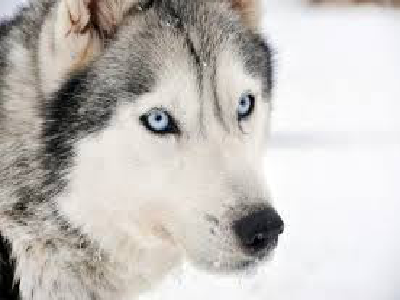

resnet18  50.4% - Eskimo dog, husky 
alexnet  47.0% - Eskimo dog, husky 
vgg16  50.0% - Eskimo dog, husky 
squeezenet  69.8% - Eskimo dog, husky 
densenet  59.4% - Eskimo dog, husky 
shufflenet  70.3% - Eskimo dog, husky 
mobilenet  51.9% - Siberian husky 
resnext50_32x4d  49.8% - Siberian husky 
wide_resnet50_2  51.8% - Eskimo dog, husky 
mnasnet  47.8% - Eskimo dog, husky 
resnext101_32x8d  58.6% - Siberian husky 


Thor_1
--------------------------------------------------


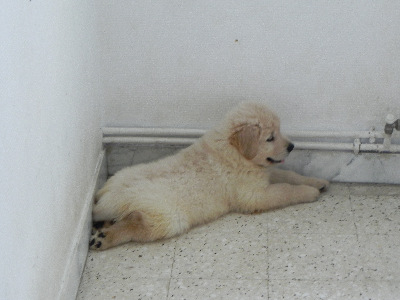

resnet18  48.5% - Great Pyrenees 
alexnet  26.7% - chow, chow chow 
vgg16  36.5% - kuvasz 
squeezenet  28.0% - Great Pyrenees 
densenet  54.4% - kuvasz 
shufflenet  44.6% - golden retriever 
mobilenet  54.4% - kuvasz 
resnext50_32x4d  85.1% - kuvasz 
wide_resnet50_2  70.2% - kuvasz 
mnasnet  68.5% - kuvasz 
resnext101_32x8d  90.6% - kuvasz 


In [10]:
# Here we define several torchvision models
import torchvision.models as models

resnet18         = models.resnet18(pretrained=True)
alexnet          = models.alexnet(pretrained=True)
vgg16            = models.vgg16(pretrained=True)
squeezenet       = models.squeezenet1_0(pretrained=True)
densenet         = models.densenet161(pretrained=True)
shufflenet       = models.shufflenet_v2_x1_0(pretrained=True)
mobilenet        = models.mobilenet_v2(pretrained=True)
resnext50_32x4d  = models.resnext50_32x4d(pretrained=True)
wide_resnet50_2  = models.wide_resnet50_2(pretrained=True)
mnasnet          = models.mnasnet1_0(pretrained=True)
resnext101_32x8d = models.resnext101_32x8d(pretrained=True)


import os
for i in os.listdir('images') :
    
    if i[-4:]=='.jpg' :
        print('\n\n', i[:-4], '\n', '-'*50, sep='')
        img = Image.open("images/%s"%i)
        
        display(img.resize((400,300)))

        img_t = transform(img)
        batch_t = torch.unsqueeze(img_t, 0)

        for model, name in zip([resnet18, alexnet, vgg16, squeezenet, densenet,
                                shufflenet, mobilenet, resnext50_32x4d, wide_resnet50_2, mnasnet,
                               resnext101_32x8d],
                               ['resnet18', 'alexnet', 'vgg16', 'squeezenet', 'densenet',
                                'shufflenet', 'mobilenet', 'resnext50_32x4d', 'wide_resnet50_2', 'mnasnet',
                                'resnext101_32x8d']) :

            print(name, end=' ')

            model.eval()

            out = model(batch_t)
            percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
            _, indices = torch.sort(out, descending=True)

            for idx in indices[0][:1] :
                print(' %.1f%% - %s ' %(percentage[idx].item(), labels[idx]))

# Find a label in a torchvision dataset

display cat images from the STL10 torchvision dataset

**Solution :**

In [11]:
import torchvision

image_datasets = torchvision.datasets.STL10('images', download=True, transform=transform)
dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=100,
                                             shuffle=True, num_workers=4)
#dataset_sizes = len(image_datasets)

100.0%

Extracting images/stl10_binary.tar.gz to images


In [12]:
class_names = image_datasets.classes
inputs, classes = next(iter(dataloaders))

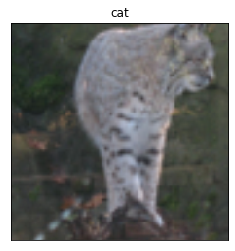

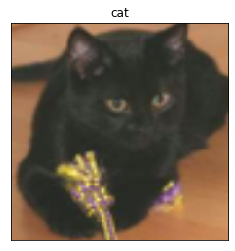

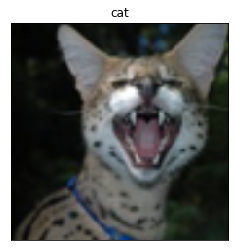

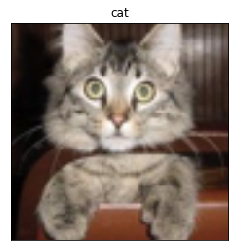

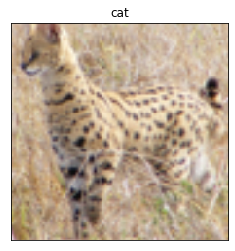

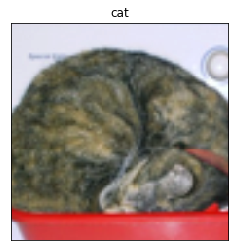

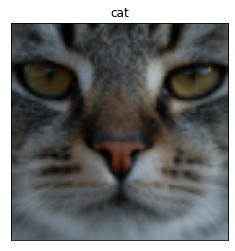

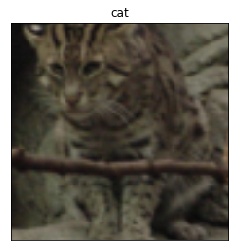

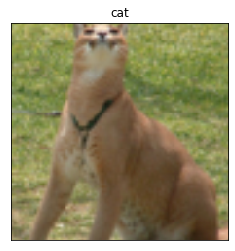

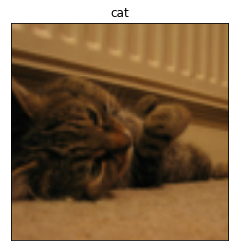

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.xticks([]) ; plt.yticks([])
    if title is not None: plt.title(title)
    plt.pause(0.001)

#out = torchvision.utils.make_grid(inputs[:8])
#imshow(out, title=[class_names[x] for x in classes[:8]])

for x in range(len(classes)) :
    if class_names[classes[x]]=='cat' :
        out = torchvision.utils.make_grid(inputs[x])
        imshow(out, title=class_names[classes[x]])